## Data Set: Street Sweeping Routes

**Data set:** My data set that I chose was the street sweeping routes. It will help determine the cleaniness of each street to determine what neighbor is the best. 

Data Set Link: https://data.wprdc.org/dataset/street-sweeping-routes/resource/a5f3ae45-0716-4652-a85c-a69424f2f4f7

**Goal:** qaunitifying results of the length of weekly sweeps of various street/neighborhoods in Pittsburgh

**Metric Explanation**: We are trying to find the best neighborhood by rating each neghborhood in 3 categories: Number of Trees, Miles Traveled to clean the Streets, and Amount of Police Incidents. Each neighborhood will be given a rating between 1 to 100 with 1 being the worst and 100 being the best. A computation will then be used to give each neighborhood a true rating based off of the ratings they received from each category.

**My Metric:** My metric is the how long it takes to clean the streets in various neighborhoods in Pittsburgh. By comparing the miles traveled on each street, it shows how long it takes to clean each street.

                       Travel_Miles
Neighborhood                       
Beechview                       6.4
Beltzhoover                     0.0
Brookline                       0.0
Carrick                         8.8
Central Lawrenceville          26.6
East Allegheny                 26.0
Elliott                        14.2
Friendship                     20.6
Garfield                       18.0
Highland Park                  35.9
Hill                           57.4
Homewood                       32.8
Knoxville                       5.2
Lower Lawrenceville            19.7
Manchester                     21.0
Morning Side                   16.9
Mt. Washington                  7.2
Oakland                        25.4
Perry North                    36.0
Point Breeze                    8.5
Regent Square                  31.4
Shadyside                      33.9
South Hills                     8.5
Squirrel Hill                  68.9
Summerset                       5.0
68.9


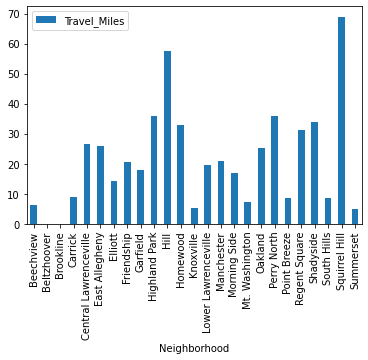

In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#Access Data Frane
street = pd.read_csv("https://data.wprdc.org/dataset/b882ba13-b01b-4a8e-a29f-5b2c0ef73566/resource/a5f3ae45-0716-4652-a85c-a69424f2f4f7/download/routestable.csv", index_col="Route Description", dtype={"id": int})

#Splice through the Travel Miles and add to my own data frame
streets = {"Travel_Miles": street.loc[:, "Travel Miles"]}
che = pd.DataFrame(streets)

#Group together Routes 
che = che.groupby("Route Description").sum()
#print(che)
ches = che.groupby(che.index.str.split().str[0]).Travel_Miles.sum().reset_index()

#Remaned Route Description to Neighborhood in Data Frame
ches2 = ches.rename({'Route Description': 'Neighborhood'}, axis=1)

#Editted names in Neighborhood index
ches3 =ches2.set_index('Neighborhood')
ches3.rename(index={"Central":'Central Lawrenceville',"East":'East Allegheny', "Elliott,": "Elliott", "Highland": "Highland Park", "Lower": "Lower Lawrenceville", "Morning": "Morning Side", "Mt": "Mt. Washington", "Perry": "Perry North", "Point": "Point Breeze", "Regent": "Regent Square", "South": "South Hills", "Squirrel": "Squirrel Hill"}, inplace=True)
print(ches3)

# Visualization here
ches3.plot(kind="bar")

# Metric Part 1...
    # Find the max of data set...
column = ches3["Travel_Miles"]
max_value = column.max()
print(max_value)


In [2]:
# Metric Part 2...
    
    # create a new column and solve for rating...
ches3['Rating'] = ((ches3["Travel_Miles"] * 100).div(max_value))

print(ches3) 

                       Travel_Miles      Rating
Neighborhood                                   
Beechview                       6.4    9.288824
Beltzhoover                     0.0    0.000000
Brookline                       0.0    0.000000
Carrick                         8.8   12.772134
Central Lawrenceville          26.6   38.606676
East Allegheny                 26.0   37.735849
Elliott                        14.2   20.609579
Friendship                     20.6   29.898403
Garfield                       18.0   26.124819
Highland Park                  35.9   52.104499
Hill                           57.4   83.309144
Homewood                       32.8   47.605225
Knoxville                       5.2    7.547170
Lower Lawrenceville            19.7   28.592163
Manchester                     21.0   30.478955
Morning Side                   16.9   24.528302
Mt. Washington                  7.2   10.449927
Oakland                        25.4   36.865022
Perry North                    36.0   52

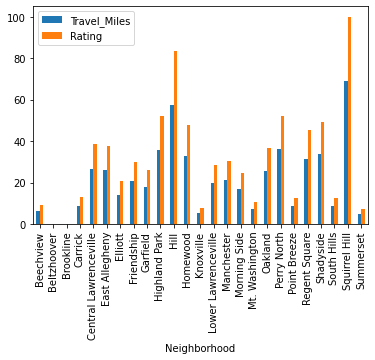

In [3]:
# Visualization here
ches3.plot(kind="bar")

**The Best Neighborhood in Pittsburgh:**

From the data presented it turns out that **Squirell Hill** is the best neighborhood in Pittsburgh! They way that I determined this is by rating each street by a number from 1-100!

**Conclusion:**

In conclusion, Squirell Hill is the best neighboorhood in Pittsburgh! They had the highest percentage at the end of the day. By earning a 100%, they are there streats are the cleanest in Pittsburgh. 